# Model Testing

## Requirements

In [41]:
# Needed Libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Scikit Learn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn import linear_model

## Data Loading

In [42]:
# Prefix for the calibration data to identify the correct file
prefix = "e2e_test3"

# Load the data from the calibrations csv file
df = pd.read_csv(rf"C:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\app\services\calib_validation\csv\data\{prefix}_fixed_train_data.csv")

# Drop the columns that are not needed
df = df.drop(["screen_height", "screen_width"], axis=1)

## Data Exploration

In [43]:
# Shape of the data
df.shape

(720, 6)

In [44]:
# Display the data for the first 5 rows
df.head()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
0,506.971497,282.207611,406.131836,278.658783,100,100
1,518.564636,280.534271,412.582733,279.688538,100,100
2,524.403320,282.937195,417.401550,282.717865,100,100
3,530.841187,287.072388,422.359680,283.891907,100,100
4,534.370300,287.437531,426.682861,285.813660,100,100


In [45]:
# Describe the data to see the statistics
df.describe()

,left_iris_x,left_iris_y,right_iris_x,right_iris_y,point_x,point_y
count,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000
mean,365.496955,328.690510,245.821749,332.613119,768.000000,365.000000
std,171.625348,26.492830,175.055159,26.174230,578.907128,229.656271
min,150.721909,279.046082,32.873291,278.658783,100.000000,100.000000
25%,162.563515,300.021774,40.361696,307.497986,100.000000,100.000000
50%,390.666397,331.088699,259.016006,335.506729,768.000000,365.000000
75%,549.767090,352.795532,437.989388,353.565865,1436.000000,630.000000
max,564.934509,370.810760,451.664612,377.217133,1436.000000,630.000000


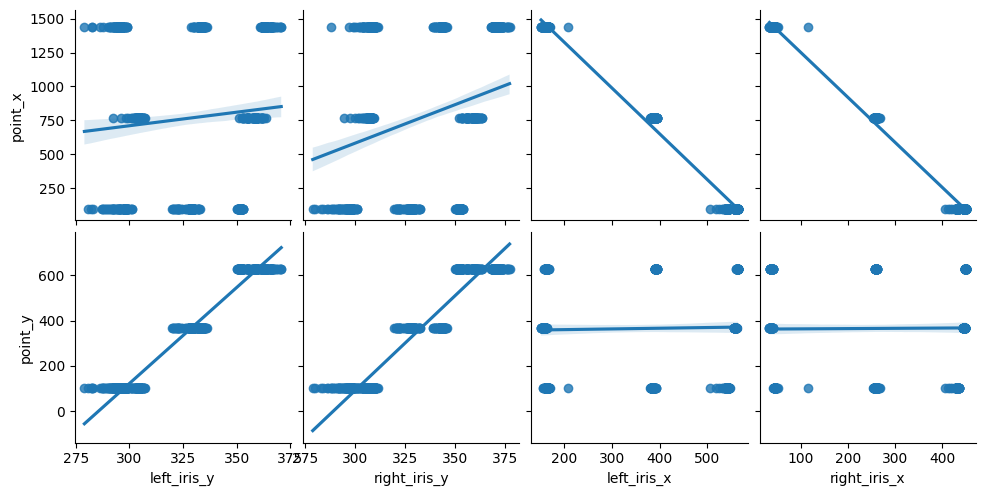

In [46]:
# Regression plot for the data
sns.pairplot(
    df,
    x_vars=["left_iris_y", "right_iris_y", "left_iris_x", "right_iris_x"],
    y_vars=["point_x", "point_y"],
    kind="reg",
)
plt.show()

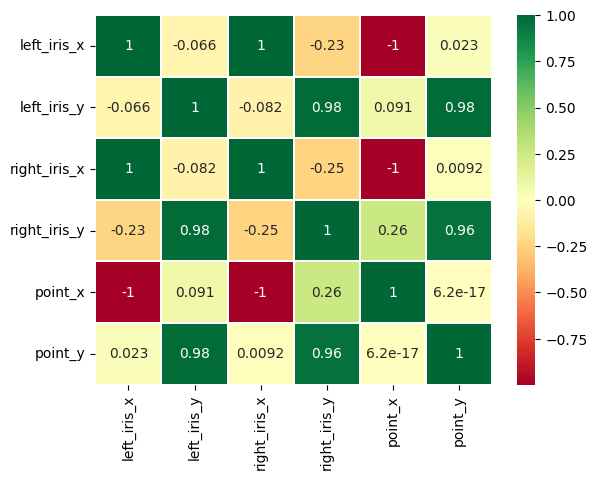

In [47]:
# Heatmap for the correlation of the data
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", linewidths=0.2)
plt.show()

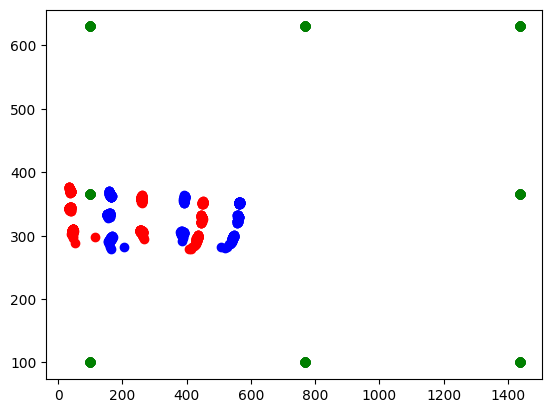

In [48]:
# Plot the data for the left and right iris and the point
plt.scatter(df["left_iris_x"], df["left_iris_y"], color="blue")
plt.scatter(df["right_iris_x"], df["right_iris_y"], color="red")
plt.scatter(df["point_x"], df["point_y"], color="green")
plt.show()

## Model Training

In [49]:
# Left iris X and right iris X
X_x = df[["left_iris_x", "right_iris_x"]]
X_y = df["point_x"]

In [50]:
# Transform the data by standardizing it
sc = StandardScaler()
X_x = sc.fit_transform(X_x)

In [51]:
# Display the data for the first 5 rows after standardizing
X_x[:5]

array([[0.82489499, 0.91640561],
       [0.89249106, 0.95328188],
       [0.92653465, 0.98082844],
       [0.96407189, 1.00917137],
       [0.98464908, 1.03388465]])

In [52]:
# Display first 5 rows
X_y[:5]

0    100
1    100
2    100
3    100
4    100
Name: point_x, dtype: int64

In [53]:
# Split the data into training and testing sets
X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
    X_x, X_y, test_size=0.2, random_state=42
)

In [54]:
# Create a ElasticNetCV model and fit the data
model_x = make_pipeline(
    PolynomialFeatures(2),
    linear_model.ElasticNetCV(alphas=(0.1, 1.0, 10.0), l1_ratio=0.5),
)
model_x.fit(X_train_x, y_train_x)

# Predict the data and calculate the r2 score
y_pred_x = model_x.predict(X_test_x)
r2_score(y_test_x, y_pred_x)

0.9966165885337552

In [55]:
# Look at the predicted data
y_pred_x

array([ 774.21757722,  762.32695009,  160.82949933,   92.4830288 ,
       1415.65994118,  158.77776525,  156.94515186,  103.83019647,
        767.50804767,  752.95912389, 1414.86308469,  747.9448386 ,
        165.42635101,  113.68221387,  752.29436934,  776.31466822,
        152.329388  , 1419.92937548,   94.66378085,   91.23633019,
        748.92120668,  751.82596039,  168.08421862, 1421.72975029,
       1413.71481463,  774.91539079,   90.61874144,   93.68298702,
         99.15313706,  104.9303305 ,  754.17935532,  752.81450251,
        775.18148952,  754.67200875, 1437.94819259, 1428.25272319,
       1413.15643443, 1437.67918868, 1434.36710776, 1413.92382468,
        764.33373976,  105.97272448,  161.93670039, 1418.33768333,
        752.15757025,  157.79311846,  777.72304334, 1424.6911829 ,
       1425.26592981,  158.59419713, 1410.36405828, 1424.35031864,
        745.20672642, 1422.39779083,  100.6889481 ,  764.19503218,
         93.42135941,   91.43280158,  157.93198776,  775.24391

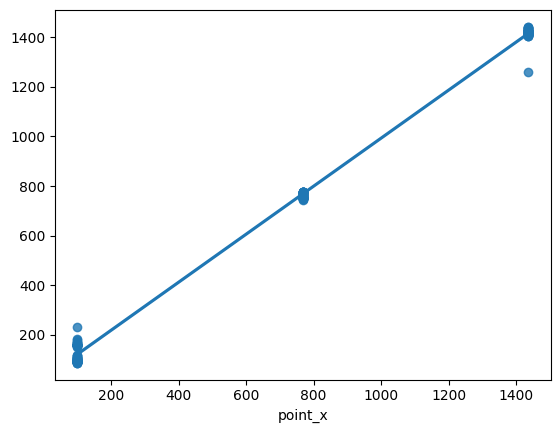

In [56]:
# Plot the data
sns.regplot(x=y_test_x, y=y_pred_x)
plt.show()

In [57]:
# Left iris Y and right iris Y
X_y = df[["left_iris_y", "right_iris_y"]]
y_y = df["point_y"]

In [58]:
# Transform the data by standardizing it
sc = StandardScaler()
X_y = sc.fit_transform(X_y)

In [59]:
# Display the data for the first 5 rows after standardizing
X_y[:5]

array([[-1.75576606, -2.06278627],
       [-1.81897195, -2.02341661],
       [-1.728208  , -1.90759914],
       [-1.57201225, -1.86271308],
       [-1.55821997, -1.78924048]])

In [60]:
# Display first 5 rows
y_y[:5]

0    100
1    100
2    100
3    100
4    100
Name: point_y, dtype: int64

In [61]:
# Split the data into training and testing sets
X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
    X_y, y_y, test_size=0.2, random_state=42
)

In [62]:
# Create a ElasticNetCV model and fit the data
model_y = make_pipeline(
    PolynomialFeatures(2),
    linear_model.ElasticNetCV(alphas=(0.1, 1.0, 10.0), l1_ratio=0.5),
)
model_y.fit(X_train_y, y_train_y)

# Predict the data and calculate the r2 score
y_pred_y = model_y.predict(X_test_y)
r2_score(y_test_y, y_pred_y)

0.9544525609675586

In [63]:
# Look at the predicted data
y_pred_y

array([163.62920734, 144.35081307,  93.70953005, 556.7896188 ,
        58.44975618, 107.73288393, 104.18291045, 358.45979342,
       159.75427595, 616.49409602, 640.6188396 , 643.3361415 ,
        84.77862831, 297.17071678, 616.89348864, 164.34964657,
       115.54948765, 428.21129208, 550.2961131 , 549.76418449,
       645.6263344 , 569.605286  ,  72.93158039, 651.6663148 ,
       126.06120853, 158.68051212, 554.8815117 , 552.43400951,
       339.13121777, 347.45218426, 609.56524314, 559.63960144,
       153.90761289, 583.14379649, 406.17829791, 708.14334659,
       647.47993132, 416.86507696, 411.86245919, 121.09142846,
       150.88625209, 346.26945602,  90.96919913, 660.25860343,
       600.95243354,  96.83547563, 166.36521787, 423.23666311,
       683.53222   , 102.42712849, 143.36592422, 657.56154953,
       625.45758081, 384.88128067, 352.06682834, 165.25977488,
       552.57831271, 546.76511473, 107.29955997, 164.83878947,
       141.03976837,  32.736619  , 102.46679039, 614.80

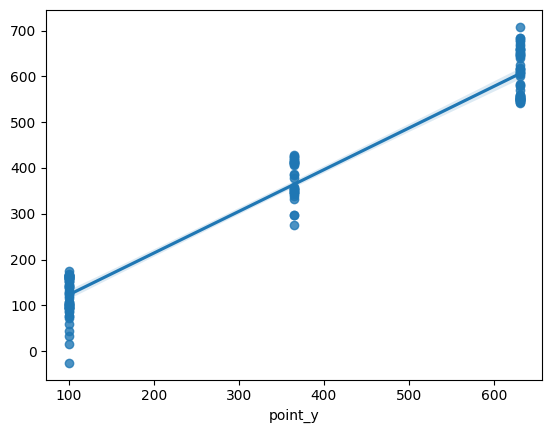

In [64]:
# Plot the data
sns.regplot(x=y_test_y, y=y_pred_y)
plt.show()

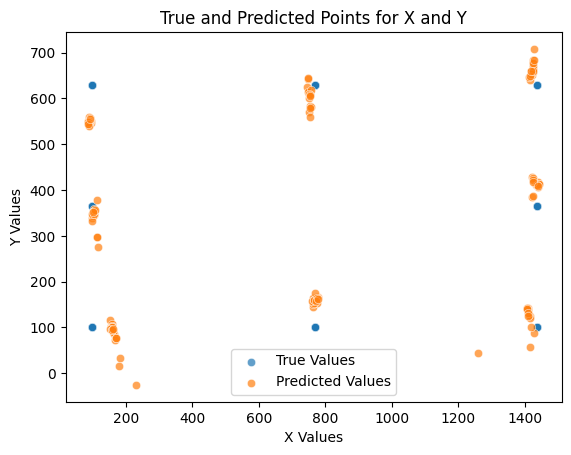

In [65]:
# Data dictionary for the true and predicted values
data = {
    "True X": y_test_x,
    "Predicted X": y_pred_x,
    "True Y": y_test_y,
    "Predicted Y": y_pred_y,
}

# Scatter plot for the true and predicted values
sns.scatterplot(x="True X", y="True Y", data=data, label="True Values", alpha=0.7)
sns.scatterplot(
    x="Predicted X", y="Predicted Y", data=data, label="Predicted Values", alpha=0.7
)

# Plot title and labels
plt.title("True and Predicted Points for X and Y")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.legend()

# Show the plot
plt.show()

In [66]:
# Create a new dataframe with the True X and Y values
df_data = pd.DataFrame(data)
df_data["True XY"] = list(zip(df_data["True X"], df_data["True Y"]))

In [67]:
# Display the data
df_data

,True X,Predicted X,True Y,Predicted Y,True XY
340,768,774.217577,100,163.629207,"(768, 100)"
290,768,762.326950,100,144.350813,"(768, 100)"
54,100,160.829499,100,93.709530,"(100, 100)"
198,100,92.483029,630,556.789619,"(100, 630)"
453,1436,1415.659941,100,58.449756,"(1436, 100)"
...,...,...,...,...,...
164,100,106.320664,365,354.510258,"(100, 365)"
165,100,107.466669,365,356.432153,"(100, 365)"
199,100,93.702447,630,555.129464,"(100, 630)"
132,100,102.992943,365,352.951389,"(100, 365)"


In [68]:
# Only 5 rows
df_data.head()

,True X,Predicted X,True Y,Predicted Y,True XY
340,768,774.217577,100,163.629207,"(768, 100)"
290,768,762.326950,100,144.350813,"(768, 100)"
54,100,160.829499,100,93.709530,"(100, 100)"
198,100,92.483029,630,556.789619,"(100, 630)"
453,1436,1415.659941,100,58.449756,"(1436, 100)"


In [69]:
# Shape of the data
df_data.shape

(144, 5)

In [70]:
# Let's filter the data to remove the unwanted values
df_data = df_data[(df_data["Predicted X"] >= 0) & (df_data["Predicted Y"] >= 0)]
df_data = df_data[
    (abs(df_data["Predicted X"] - df_data["True X"]) <= 100)
    & (abs(df_data["Predicted Y"] - df_data["True Y"]) <= 100)
]

In [71]:
# Shape of the data
df_data.shape

(142, 5)

In [72]:
# Precision is calculated via the Root Mean Square from the
# successive data points [in degrees of visual angle θi between
# successive (x1,y1) to (xi+1, yi+1) samples], both for each eye
# individually and as a mean from the two

# Another option to describe the variation in the data is to
# measure the standard deviation of the data set, equivalent
# to the RMS normalized by the mean


def func_x(group):
    """
    Calculate the root mean square error between the predicted X and true X values.

    Parameters:
    group (pandas.DataFrame): A DataFrame containing the predicted X and true X values.

    Returns:
    float: The root mean square error between the predicted X and true X values.
    """
    return np.sqrt(np.sum(np.square([group["Predicted X"], group["True X"]])))


def func_y(group):
    """
    Calculate the root mean square error between the predicted Y values and the true Y values.

    Parameters:
    - group: pandas.DataFrame
        A DataFrame containing the predicted Y values and the true Y values.

    Returns:
    - float
        The root mean square error between the predicted Y values and the true Y values.
    """
    return np.sqrt(np.sum(np.square([group["Predicted Y"], group["True Y"]])))


# Calculate the precision for the X and Y values
precision_x = df_data.groupby("True XY").apply(func_x)
precision_y = df_data.groupby("True XY").apply(func_y)

# Calculate the mean precision for the X and Y values
precision_xy = (precision_x + precision_y) / 2
precision_xy = precision_xy / np.mean(precision_xy)

print("mean", precision_xy)

mean True XY
(100, 100)     0.235302
(100, 365)     0.408093
(100, 630)     0.667081
(768, 100)     0.919394
(768, 630)     1.232948
(1436, 100)    1.202288
(1436, 365)    1.532106
(1436, 630)    1.802787
dtype: float64


C:\Users\SITAM MEUR\AppData\Local\Temp\ipykernel_15712\3757417304.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  precision_x = df_data.groupby("True XY").apply(func_x)
C:\Users\SITAM MEUR\AppData\Local\Temp\ipykernel_15712\3757417304.py:41: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  precision_y = df_data.groupby("True XY").apply(func_y)


In [73]:
# Create a dictionary to store the data
data = {}

# Iterate over df_data to get the data
for index, row in df_data.iterrows():

    # Get the outer and inner keys
    outer_key = str(row["True X"])
    inner_key = str(row["True Y"])

    # If the outer key is not in the data, add it
    if outer_key not in data:
        data[outer_key] = {}

    # Add the data to the dictionary
    data[outer_key][inner_key] = {
        "predicted_x": df_data[
            (df_data["True X"] == row["True X"]) & (df_data["True Y"] == row["True Y"])
        ]["Predicted X"].values.tolist(),
        "predicted_y": df_data[
            (df_data["True X"] == row["True X"]) & (df_data["True Y"] == row["True Y"])
        ]["Predicted Y"].values.tolist(),
        "PrecisionSD": precision_xy[(row["True X"], row["True Y"])],
    }

In [74]:
# Create an numpy array to store the transposed data
data = np.array([y_pred_x, y_pred_y]).T

In [75]:
# Shape of the data
data.shape

(144, 2)

In [76]:
# Create a KMeans model with 8 clusters
model = KMeans(n_clusters=8, n_init="auto", init="k-means++")

# Fit the data to the model
y_kmeans = model.fit_predict(data)

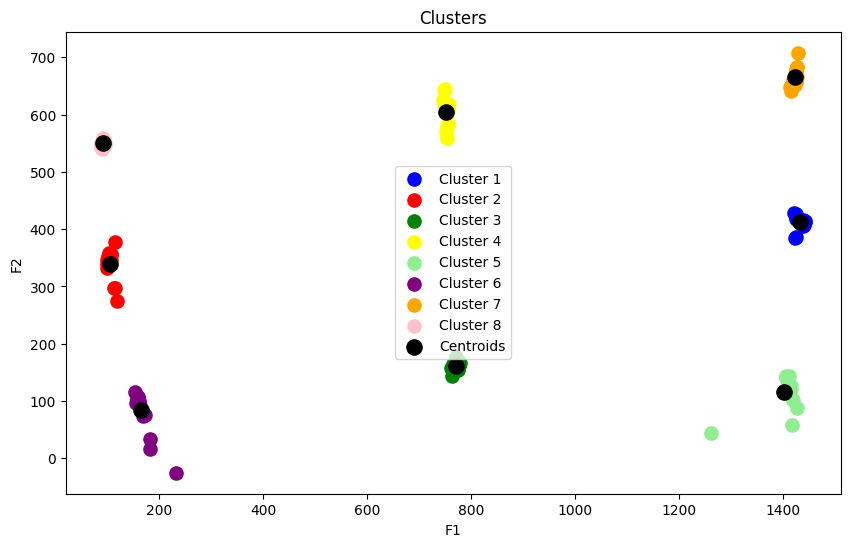

In [77]:
# Plot figure size
plt.figure(figsize=(10, 6))

# Scatter plot for the data
plt.scatter(
    data[y_kmeans == 0, 0], data[y_kmeans == 0, 1], s=90, c="blue", label="Cluster 1"
)
plt.scatter(
    data[y_kmeans == 1, 0], data[y_kmeans == 1, 1], s=90, c="red", label="Cluster 2"
)
plt.scatter(
    data[y_kmeans == 2, 0], data[y_kmeans == 2, 1], s=90, c="green", label="Cluster 3"
)
plt.scatter(
    data[y_kmeans == 3, 0], data[y_kmeans == 3, 1], s=90, c="yellow", label="Cluster 4"
)
plt.scatter(
    data[y_kmeans == 4, 0], data[y_kmeans == 4, 1], s=90, c="lightgreen", label="Cluster 5"
)
plt.scatter(
    data[y_kmeans == 5, 0], data[y_kmeans == 5, 1], s=90, c="purple", label="Cluster 6"
)
plt.scatter(
    data[y_kmeans == 6, 0], data[y_kmeans == 6, 1], s=90, c="orange", label="Cluster 7"
)
plt.scatter(
    data[y_kmeans == 7, 0], data[y_kmeans == 7, 1], s=90, c="pink", label="Cluster 8"
)
plt.scatter(
    model.cluster_centers_[:, 0],
    model.cluster_centers_[:, 1],
    s=120,
    c="black",
    label="Centroids",
)

# Plot title and labels
plt.title("Clusters")

plt.xlabel("F1")
plt.ylabel("F2")

plt.legend()

# Show the plot
plt.show()

## Testing

In [78]:
def plot(ax, y_test_x, y_pred_x, y_test_y, y_pred_y, title=None):
    """
    Plots the true and predicted points for X and Y coordinates.

    Parameters:
    - ax (matplotlib.axes.Axes): The axes object to plot on.
    - y_test_x (list or numpy.ndarray): The true X coordinates.
    - y_pred_x (list or numpy.ndarray): The predicted X coordinates.
    - y_test_y (list or numpy.ndarray): The true Y coordinates.
    - y_pred_y (list or numpy.ndarray): The predicted Y coordinates.
    - title (str, optional): The title of the plot. Defaults to None.

    Returns:
    - None
    """

    # Convert the data to numpy arrays
    y_test_x = np.array(y_test_x)
    y_test_y = np.array(y_test_y)

    # True points as a list of tuples
    true_points = [(y_test_x[i], y_test_y[i]) for i in range(len(y_test_x))]

    # Define the error range
    error_range = 0.05

    # Create a DataFrame with the true and predicted values
    data = {
        "True X": y_test_x,
        "Predicted X": y_pred_x,
        "True Y": y_test_y,
        "Predicted Y": y_pred_y,
    }

    # Plot the true and predicted points for X and Y
    sns.scatterplot(
        x="True X",
        y="True Y",
        data=data,
        label="True Values",
        alpha=0.7,
        ax=ax,
        color="red",
    )
    sns.scatterplot(
        x="Predicted X",
        y="Predicted Y",
        data=data,
        label="Predicted Values",
        alpha=0.7,
        ax=ax,
        color="green",
    )

    # Calculate the circle radius
    circle_radius = (
        error_range
        * (max(y_test_x) - min(y_test_x) + max(y_test_y) - min(y_test_y))
        / 2
    )

    # Iterate over the true points
    for true_x, true_y in true_points:

        # Get the predicted values within the error range
        x_within_range = [
            y_pred_x[j]
            for j in range(len(y_test_x))
            if abs(y_test_x[j] - true_x) <= error_range
        ]
        y_within_range = [
            y_pred_y[j]
            for j in range(len(y_test_y))
            if abs(y_test_y[j] - true_y) <= error_range
        ]

        # If there are more than one predicted values within the error range
        if len(x_within_range) > 1 and len(y_within_range) > 1:

            # Calculate the combined predictions and true values
            combined_predictions = x_within_range + y_within_range
            combined_true = [true_x] * len(x_within_range) + [true_y] * len(
                y_within_range
            )

            # Calculate the R2 score and MAE for the combined values
            r2_combined = r2_score(combined_true, combined_predictions)
            mae_combined = mean_absolute_error(combined_true, combined_predictions)

            # Create a circle patch
            circle = plt.Circle(
                (true_x, true_y), circle_radius, color="yellow", fill=False
            )

            # Add the circle to the plot
            ax.add_patch(circle)
            ax.text(
                true_x + 0.1,
                true_y + 0.1,
                f"R2={r2_combined:.2f}\nMAE={mae_combined:.2f}",
                fontsize=8,
                color="blue",
            )

    # Set the title and legend
    title = title if title else "True and Predicted Points for X and Y"
    ax.set_title(title)
    ax.legend()

In [79]:
def analysis(df, ax=None, title=None):
    """
    Perform analysis on the given DataFrame.

    Parameters:
    - df: DataFrame
        The input DataFrame containing the data for analysis.
    - ax: AxesSubplot, optional
        The subplot to plot the analysis results on.
    - title: str, optional
        The title of the plot.

    Returns:
    None
    """

    # Initialize the StandardScaler and ElasticNetCV model
    # with polynomial features up to degree 2
    sc = StandardScaler()
    model = make_pipeline(PolynomialFeatures(2), linear_model.ElasticNetCV())

    # Define the parameter grid for GridSearchCV
    param_grid = {
        "elasticnetcv__alphas": [[0.1, 1.0, 10.0], [0.01, 0.1, 1.0], [0.001, 0.01, 0.1]],
        "elasticnetcv__l1_ratio": [0, 0.01, 0.2, 0.5, 0.8, 1],
    }

    # Set the scoring metrics for GridSearchCV to r2_score and mean_absolute_error
    scoring = {
        "r2": make_scorer(r2_score),
        "mae": make_scorer(mean_absolute_error),
    }

    # Initialize GridSearchCV with the model and parameter grid
    grid_search = GridSearchCV(
        model, param_grid, cv=5, scoring=scoring, refit="r2", return_train_score=True
    )

    """For Left Iris X and Right Iris X model training and testing"""
    # Left iris X and right iris X
    X_x = df[["left_iris_x", "right_iris_x"]]
    y_x = df["point_x"]

    # Transform the data by standardizing it
    X_x = sc.fit_transform(X_x)

    # Split the data into training and testing sets
    X_train_x, X_test_x, y_train_x, y_test_x = train_test_split(
        X_x, y_x, test_size=0.2, random_state=42
    )

    # Fit the model to the training data for X using GridSearchCV
    grid_search.fit(X_train_x, y_train_x)

    # Use the best model to predict the values and calculate the R2 score
    best_model_x = grid_search.best_estimator_
    y_pred_x = best_model_x.predict(X_test_x)
    r2_score_x = r2_score(y_test_x, y_pred_x)
    print("-------------------MODEL RESULT FOR X------------------")
    print(
        f'Best alphas for X: {grid_search.best_params_["elasticnetcv__alphas"]}, Best l1_ratio for X: {grid_search.best_params_["elasticnetcv__l1_ratio"]}, R2 score : {r2_score_x}'
    )
    print("-------------------------------------------------------")

    """For Left Iris Y and Right Iris Y model training and testing"""
    # Left iris Y and right iris Y
    X_y = df[["left_iris_y", "right_iris_y"]]
    y_y = df["point_y"]

    # Transform the data by standardizing it
    X_y = sc.fit_transform(X_y)

    # Split the data into training and testing sets
    X_train_y, X_test_y, y_train_y, y_test_y = train_test_split(
        X_y, y_y, test_size=0.2, random_state=42
    )

    # Fit the model to the training data for Y using GridSearchCV
    grid_search.fit(X_train_y, y_train_y)

    # Use the best model to predict the values and calculate the R2 score
    best_model_y = grid_search.best_estimator_
    y_pred_y = best_model_y.predict(X_test_y)
    r2_score_y = r2_score(y_test_y, y_pred_y)
    print("-------------------MODEL RESULT FOR Y------------------")
    print(
        f'Best alphas for Y: {grid_search.best_params_["elasticnetcv__alphas"]}, Best l1_ratio for Y: {grid_search.best_params_["elasticnetcv__l1_ratio"]}, R2 score : {r2_score_y}'
    )
    print("-------------------------------------------------------")

    # Plot the true and predicted points for X and Y
    plot(ax, y_test_x, y_pred_x, y_test_y, y_pred_y, title)

c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52241392.984785445, tolerance: 12614.073443478263
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model

-------------------MODEL RESULT FOR X------------------
Best alphas for X: [0.001, 0.01, 0.1], Best l1_ratio for X: 0.8, R2 score : 0.9982355264998006
-------------------------------------------------------


c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3299.8101275265217, tolerance: 1878.2897554347828
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10845.021059398074, tolerance: 1935.4620652173908
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:683: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10028.077613340341, tolerance: 19

-------------------MODEL RESULT FOR Y------------------
Best alphas for Y: [0.001, 0.01, 0.1], Best l1_ratio for Y: 1, R2 score : 0.9767994846187407
-------------------------------------------------------


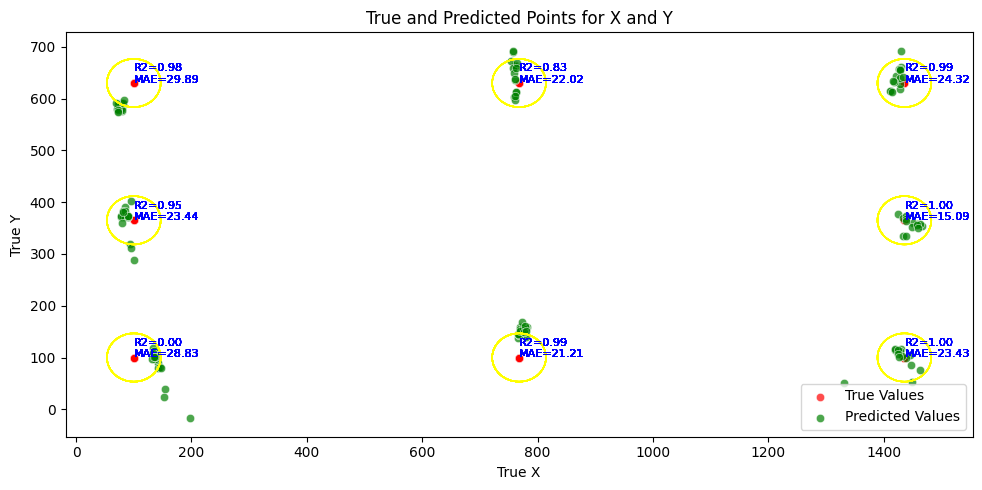

In [80]:
# Load the data from the calibrations csv file
df = pd.read_csv(rf"C:\Users\SITAM MEUR\Desktop\web-eye-tracker-main\web-eye-tracker-main\app\services\calib_validation\csv\data\{prefix}_fixed_train_data.csv")
df = df.drop(["screen_height", "screen_width"], axis=1)

# Create a list of DataFrames
df_list = [df]

# num_rows = len(df_list) // 2 + len(df_list) % 2
# num_cols = min(2, len(df_list))

# Calculate the number of rows and columns
num_rows = len(df_list)
num_cols = 1

# Create a figure and axes
fig_height = 5 * num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, fig_height), squeeze=False)

# Iterate over the DataFrames
for i, df in enumerate(df_list):

    # row_idx = i // num_cols
    # col_idx = i % num_cols

    row_idx = i
    col_idx = 0

    ax = axes[row_idx, col_idx]

    # Perform the analysis
    analysis(df, ax)

# Plot the data
plt.tight_layout()
plt.show()